Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library(tidymodels)



Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.8     ✔ recipes      1.3.1
✔ dials        1.4.0     ✔ rsample      1.3.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.2     ✔ tidyr        1.3.1
✔ infer        1.0.8     ✔ tune         1.3.0
✔ modeldata    1.4.0     ✔ workflows    1.2.0
✔ parsnip      1.3.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.4     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [3]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [4]:
glimpse(diabetes_train)



Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 10, 1, 1, 5, 3, 11, 3, 7, 7, 1, 2, 7, 5…
$ Glucose                  <dbl> 85, 89, 115, 103, 97, 109, 88, 138, 180, 106,…
$ BloodPressure            <dbl> 66, 66, 0, 30, 66, 75, 58, 76, 64, 92, 64, 56…
$ SkinThickness            <dbl> 29, 23, 0, 38, 15, 26, 11, 0, 25, 18, 0, 0, 2…
$ Insulin                  <dbl> 0, 94, 0, 83, 140, 0, 54, 0, 70, 0, 0, 0, 0, …
$ BMI                      <dbl> 26.6, 28.1, 35.3, 43.3, 23.2, 36.0, 24.8, 33.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.134, 0.183, 0.487, 0.546, 0.2…
$ Age                      <dbl> 31, 21, 29, 33, 22, 60, 22, 35, 26, 48, 40, 2…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

In [ ]:
#The variable that is suitable as the outcome is going to be DiabetesPedigreeFunction 

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |   Plasma glucose concentration a 2 hours in an oral glucose tolerance test          |
| BMI         | Body mass index (weight in kg/(height in m)^2)            |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

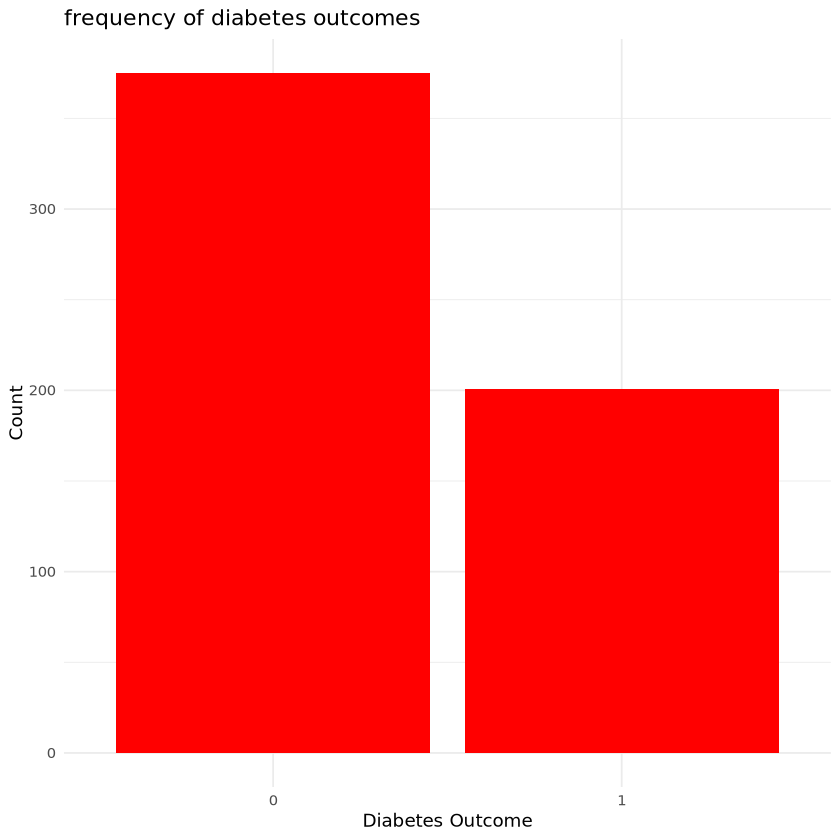

In [8]:
library(ggplot2)

ggplot(diabetes_train, aes(x = Outcome)) +
  geom_bar(fill = "red") +
  labs(title = "frequency of diabetes outcomes",
       x = "Diabetes Outcome",
       y = "Count") +
  theme_minimal()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

In [ ]:
#The data is not balanced,we have significantly more counts in the first bar. 



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [9]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

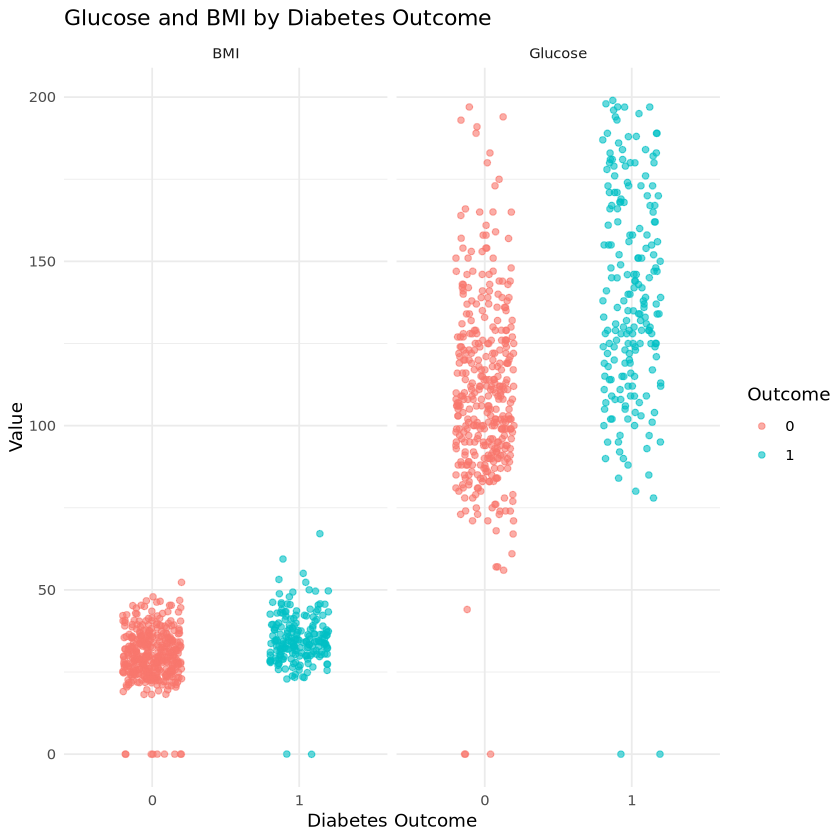

In [14]:
ggplot(plot_df, aes(x = Outcome, y = value, color = Outcome)) +
  geom_jitter(width = 0.2, alpha = 0.6) +
  facet_wrap(~name, ncol = 2, scales = 'free_x') +
  labs(title = "Glucose and BMI by Diabetes Outcome",
       x = "Diabetes Outcome",
       y = "Value") +
  theme_minimal()


❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

In [ ]:
#They would share the same x axis scale.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [16]:
log_reg_spec <- logistic_reg() %>%
  set_engine("glm") %>%
  set_mode("classification")

log_reg_fit <- log_reg_spec %>%
  fit(Outcome ~ BMI + Glucose, data = diabetes_train)



Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [21]:
diabetes_test_wPred <- augment(log_reg_fit, new_data = diabetes_test)


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [23]:
diabetes_test_wPred = augment(log_reg_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 114  29
         1  11  38

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

In [25]:
# 67
# 38
# 11